In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
dataset = pd.read_csv('Bucharest_HousePriceDataset.csv')
dataset.head()

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
0,4,108.00,2,3,4,5,83000
1,1,41.00,1,8,1,1,39900
2,3,63.52,1,3,2,3,84900
3,1,33.00,3,10,5,1,45500
4,2,62.00,5,9,5,5,54900


In [4]:
dataset.shape

(3529, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr Camere    3529 non-null   int64  
 1   Suprafata    3529 non-null   float64
 2   Etaj         3529 non-null   int64  
 3   Total Etaje  3529 non-null   int64  
 4   Sector       3529 non-null   int64  
 5   Scor         3529 non-null   int64  
 6   Pret         3529 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 193.1 KB


In [6]:
dataset.describe()

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
count,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000
mean,2.464154,69.812454,3.089544,6.427317,2.936243,3.098045,97846.330689
std,0.882514,29.086956,2.733418,3.156608,1.724560,1.442990,62844.200384
min,1.000000,16.000000,-1.000000,1.000000,1.000000,1.000000,19500.000000
25%,2.000000,52.000000,1.000000,4.000000,1.000000,2.000000,58400.000000
50%,2.000000,63.000000,2.000000,6.000000,3.000000,4.000000,78600.000000
75%,3.000000,81.000000,4.000000,9.000000,4.000000,4.000000,117500.000000
max,9.000000,350.000000,20.000000,24.000000,6.000000,5.000000,495000.000000


<AxesSubplot: >

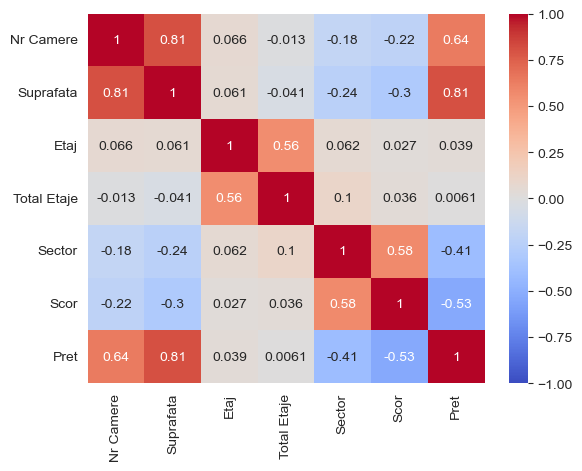

In [7]:
sns.heatmap(data=dataset.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

In [8]:
dataset.drop(['Scor'],axis =1, inplace=True)
dataset.drop(['Sector'],axis =1, inplace=True)

In [9]:
#dealing with missing valuesa
dataset.isnull().any()

Nr Camere      False
Suprafata      False
Etaj           False
Total Etaje    False
Pret           False
dtype: bool

In [11]:
# dataset['Nr Camere'].unique()
# dataset['Etaj'].unique()
dataset['Total Etaje'].unique()

array([ 3,  8, 10,  9,  6,  5,  2,  4, 11, 12, 13,  7,  1, 17, 16, 14, 18,
       24, 15], dtype=int64)

In [12]:
dataset2 = pd.get_dummies(data=dataset,columns=['Nr Camere','Etaj','Total Etaje'],drop_first=True)

In [13]:
dataset2.head()

,Suprafata,Pret,Nr Camere_2,Nr Camere_3,Nr Camere_4,Nr Camere_5,Nr Camere_6,Nr Camere_7,Nr Camere_8,Nr Camere_9,...,Total Etaje_10,Total Etaje_11,Total Etaje_12,Total Etaje_13,Total Etaje_14,Total Etaje_15,Total Etaje_16,Total Etaje_17,Total Etaje_18,Total Etaje_24
0,108.00,83000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.00,39900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63.52,84900,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.00,45500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,62.00,54900,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dataset2.shape

(3529, 46)

<AxesSubplot: ylabel='Suprafata'>

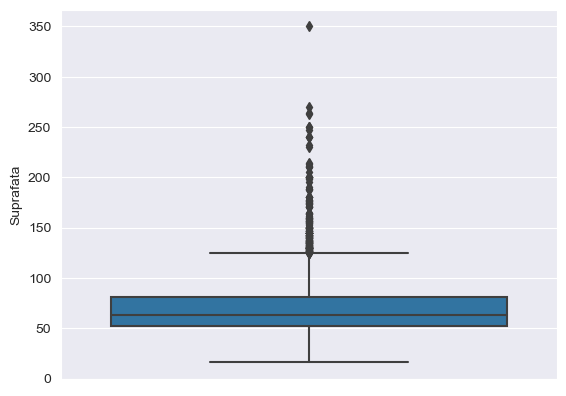

In [15]:
sns.boxplot(y=dataset2['Suprafata'])

In [16]:
# dealing with outliers
# q1 = np.quantile(dataset2['Suprafata'],q=0.0)
# q3 = np.quantile(dataset2['Suprafata'],q=0.6)
# # values between first quantile and third quantile = iqr
# iqr = q3-q1
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)
# outliers = dataset2['Suprafata'][(dataset2['Suprafata'] > upper_bound )| (dataset2['Suprafata'] < lower_bound)]
# outliers
z = np.abs(stats.zscore(dataset2['Suprafata']))
outliers = dataset2['Suprafata'][np.where(z>1.65)[0]]
outliers

5       132.00
17      200.00
36      128.65
77      247.00
102     130.15
         ...  
3490    132.00
3495    124.00
3496    124.16
3503    130.00
3515    145.00
Name: Suprafata, Length: 222, dtype: float64

In [40]:
dataset3 = dataset2.drop(outliers.index)

<AxesSubplot: ylabel='Suprafata'>

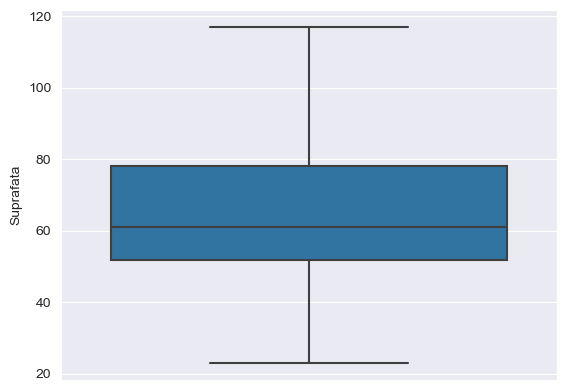

In [18]:
sns.boxplot(y=dataset3['Suprafata'])

<AxesSubplot: ylabel='Suprafata'>

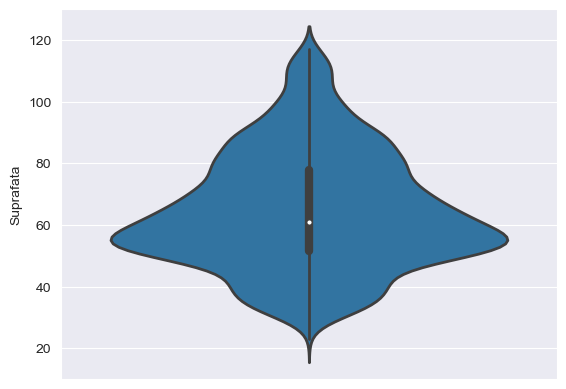

In [19]:
sns.violinplot(y=dataset3['Suprafata'],linewidth=2)

In [20]:
dataset3.shape[0]-dataset2.shape[0]

-222

<AxesSubplot: xlabel='Suprafata', ylabel='Count'>

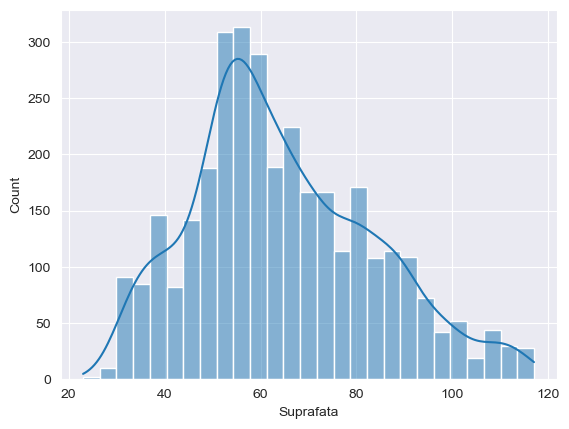

In [30]:
sns.histplot(x=dataset3['Suprafata'],kde=True)

In [34]:
# log normalization - correct the skewness
# dataset3['Suprafata'] = np.log(dataset3['Suprafata'])

In [25]:
# from sklearn.preprocessing import power_transform
# power_transform(dataset3[['Suprafata']],copy=False,method='yeo-johnson')

array([[ 1.97329451],
       [-1.34679446],
       [ 0.04826717],
       ...,
       [-1.81156809],
       [-0.14283863],
       [ 0.85180799]])

In [41]:
# standardazation => mean = 0, std = 1
dataset3['Suprafata'] = (dataset3['Suprafata'] - dataset3['Suprafata'].mean())/dataset3['Suprafata'].std()

In [38]:
# dataset3['Suprafata'] = (dataset3['Suprafata'] - dataset3['Suprafata'].min())/(dataset3['Suprafata'].max()-dataset3['Suprafata'].min())

<AxesSubplot: xlabel='Suprafata', ylabel='Count'>

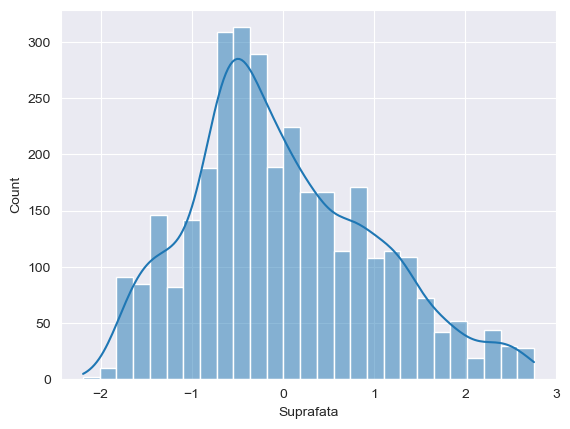

In [42]:
sns.histplot(x=dataset3['Suprafata'],kde=True)

((array([-3.52771951, -3.28566308, -3.15189656, ...,  3.15189656,
          3.28566308,  3.52771951]),
  array([-2.191139  , -2.10696007, -1.98069166, ...,  2.75437361,
          2.75437361,  2.75437361])),
 (0.9887535182621746, 1.3905704828047573e-16, 0.9879484957366408))

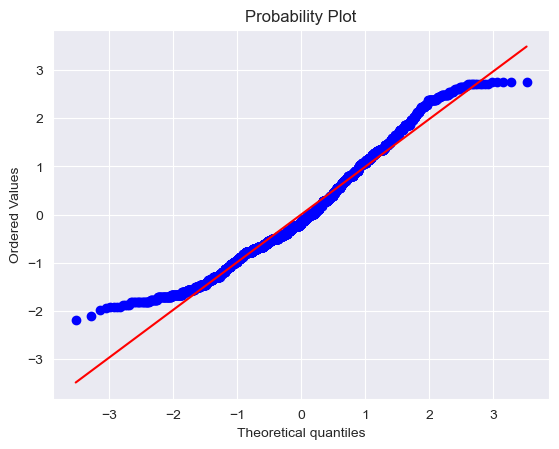

In [352]:
stats.probplot(x=dataset3['Suprafata'],plot=plt)

#Spliting data in test data and training data

In [54]:
X = dataset3.drop(['Pret'],axis = 1)
Y = dataset3['Pret']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=.2)
y_train.shape
y_test.shape

(662,)

###########Trying models###########

In [55]:
from sklearn.linear_model import LinearRegression
model_linear_reg = LinearRegression()
model_linear_reg.fit(x_train,y_train)

LinearRegression()

In [56]:
y_predict = model_linear_reg.predict(x_test)

In [59]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)
# metrics.mean_squared_error(y_test,y_predict)

0.5213438310158307